# Cross-spectral feature descriptor algorithms
Notebook used for testing and experiments.  
By: Cristiano Fraga Guimarães Nunes.  
E-mail: cfgnunes@gmail.com

---

In [1]:
import cv2
import numpy as np
import platform
import pandas as pd
from matplotlib import pyplot as plt

from descriptor.ehd import EHD
from descriptor.eoh import EOH
from descriptor.mfd import MFD
from util.featurematching import FeatureMatching
import util.plotfunctions as pf

The versions of each library used are displayed below:

In [2]:
print("Python version: %s " % platform.python_version())
print("OpenCV version: %s " % cv2.__version__)

Python version: 3.5.4rc1 
OpenCV version: 3.4.1 


---
## Define the detector and descriptor algorithms

In [3]:
result_precision = pd.DataFrame()
result_matches = pd.DataFrame()

def add_descriptor_algoritm(desc, name):
    descriptor_algorithms.append((desc, name))
    result_precision[name] = 0
    result_matches[name] = 0

# Define the detector algorithm
detector_algorithm = cv2.FastFeatureDetector_create(
    threshold=40,
    nonmaxSuppression=True)

descriptor_algorithms = []

desc = cv2.xfeatures2d.SIFT_create(
    nfeatures=500,
    nOctaveLayers=3,
    contrastThreshold=0.04,
    edgeThreshold=10.0,
    sigma=1.6)
add_descriptor_algoritm(desc, 'SIFT')

desc = EHD(window_size=80)
add_descriptor_algoritm(desc, 'EHD')

desc = EOH(window_size=80)
add_descriptor_algoritm(desc, 'EOH')

desc = MFD(window_size=80)
add_descriptor_algoritm(desc, 'MFD')

## Sample of results

In [4]:
def run_batch(image_a_filename, image_b_filename):
    # Run all algoritmhs
    result_precision_it = []
    result_matches_it = []
    for descriptor_algorithm, descriptor_name in descriptor_algorithms:
        fm = FeatureMatching(detector_algorithm, descriptor_algorithm)
        image_matches, matches, precision = fm.match_feature(image_a_filename, image_b_filename)
        title = "Algorithm %s (Best matches: %i, Precision: %.2f)" % \
            (descriptor_name, matches, precision)

        pf.plot_image_list([image_matches], [title], scale_factor=12)
        
        result_precision_it.append(precision)
        result_matches_it.append(matches)
    
    result_precision.loc[len(result_precision) + 1] = result_precision_it
    result_matches.loc[len(result_matches) + 1] = result_matches_it

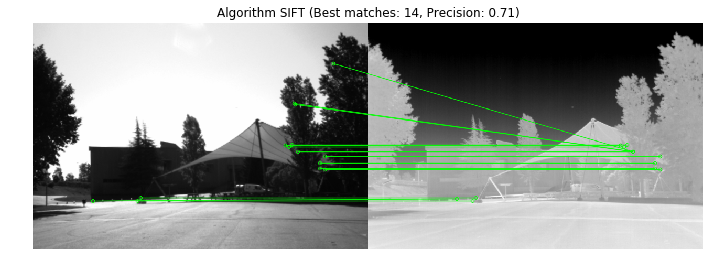

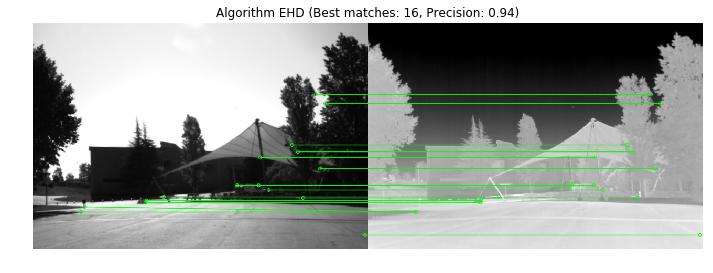

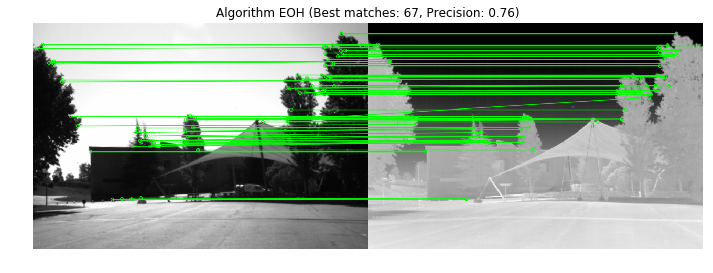

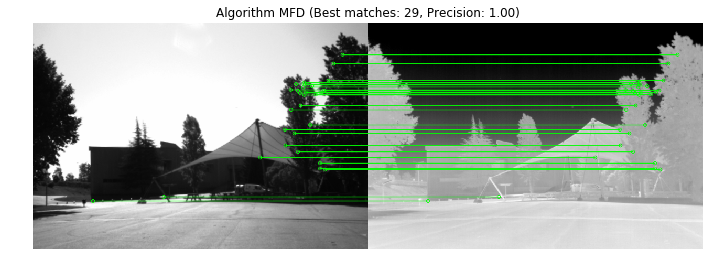

In [5]:
run_batch("images-sample/rgb37.bmp", "images-sample/lwir37.png")

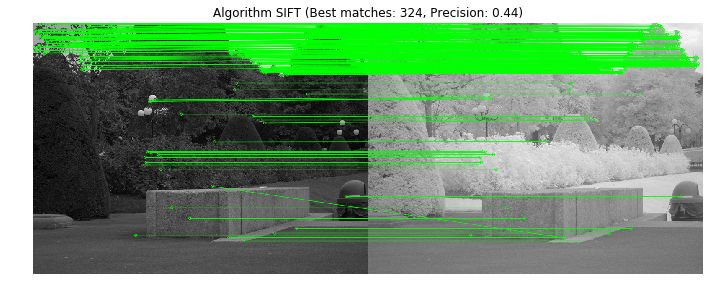

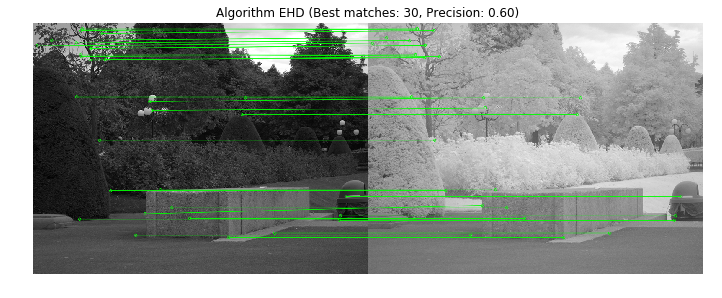

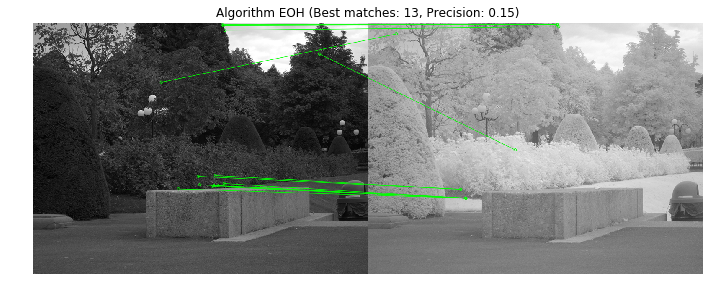

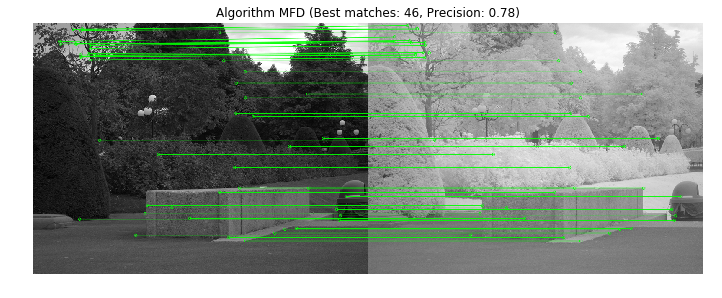

In [6]:
run_batch("images-sample/img1.png", "images-sample/img2.png")

In [7]:
result_precision.describe()

,SIFT,EHD,EOH,MFD
count,2.000000,2.000000,2.000000,2.000000
mean,0.574735,0.768750,0.457520,0.891304
std,0.197354,0.238649,0.429460,0.153719
min,0.435185,0.600000,0.153846,0.782609
25%,0.504960,0.684375,0.305683,0.836957
50%,0.574735,0.768750,0.457520,0.891304
75%,0.644511,0.853125,0.609357,0.945652
max,0.714286,0.937500,0.761194,1.000000


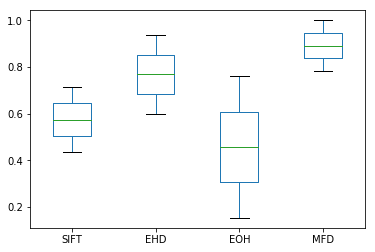

In [8]:
plot = result_precision.boxplot(grid=False)